# Educational Data Analysis Project - EDA Notebook

## 📋 Project Overview
This notebook performs an Exploratory Data Analysis (EDA) of an educational project, focusing on:
- Student performance in Portuguese (PORT) and Mathematics (MAT)
- Question bank by subject and content

The notebook identifies file loading issues, performs data cleaning, and generates visualizations for descriptive analysis.

## 📊 Analysis Structure

### 1. **Initial Configuration and Data Verification**

#### 🔍 File Verification
- Verifies the existence of files:
  - `data/desempenho.csv`
  - `data/questoes.csv`
- Both files **were not found** in the specified directory, indicating a path problem or missing data.

#### ⚠️ Possible Error Causes
- Incorrect file paths or directory structure
- Files not present in the expected location
- Permission issues
- Different file naming conventions

### 2. **Data Loading and Processing**

#### 📥 Loading and Cleaning Data
- Direct file loading with specific paths
- Data cleaning: percentage conversion, column selection
- Creation of simulated response data

### 3. **Data Exploration and Analysis**

#### 📈 Descriptive Statistics
- Student performance metrics
- Question distribution by subject
- Duplicate identification

### 4. **Data Visualization**

#### 📊 Professional Visualizations
- Grade distribution plots
- Box plots for statistical distribution
- Correlation analysis between subjects
- Question difficulty analysis
- Performance categorization

### 5. **Simulated Dataset Creation**

#### 🎯 Response Data Simulation
- Conversion of percentages to correct answers
- Random simulation of incorrect questions
- Creation of expanded dataset with all question-student combinations
- Export to CSV for further analysis

## 🚀 Implementation - Data Loading and Basic Analysis

### Cell 1: Basic Imports and Configuration

In [2]:
# Cell 1: Basic imports and configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visualization configuration
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("📚 Starting EDA of Educational Project")

# Verify if data files exist with CORRECT names
print("\n🔍 Verifying data files:")
data_files = [
    '/Users/mac/IronHacks/W9/Final Project 6/data/desempenho.csv',
    '/Users/mac/IronHacks/W9/Final Project 6/data/questoes.csv'
]

for file in data_files:
    if os.path.exists(file):
        print(f"✅ {file} - FOUND")
    else:
        print(f"❌ {file} - NOT FOUND")

📚 Starting EDA of Educational Project

🔍 Verifying data files:
✅ /Users/mac/IronHacks/W9/Final Project 6/data/desempenho.csv - FOUND
✅ /Users/mac/IronHacks/W9/Final Project 6/data/questoes.csv - FOUND


### Cell 2: Alternative Direct Loading (Simpler)

In [2]:
# Cell 2 alternative: Direct loading (simpler)
print("=== DIRECT LOADING ===")

# Load student data
df_alunos = pd.read_csv('/Users/mac/IronHacks/W9/Final Project 6/data/desempenho.csv', encoding='utf-8')

# Keep only important columns
colunas_manter_alunos = ['Série', 'RA', 'Nome', 'PORT', 'MAT']
df_alunos = df_alunos[colunas_manter_alunos]

# Convert percentages
for col in ['PORT', 'MAT']:
    df_alunos[col] = df_alunos[col].str.replace('%', '').str.replace(',', '.').astype(float)

print("✅ Student data loaded!")
print(f"Columns: {df_alunos.columns.tolist()}")
print(f"Shape: {df_alunos.shape}")

# Load question data
df_questoes = pd.read_csv('/Users/mac/IronHacks/W9/Final Project 4/data/questoes.csv', encoding='utf-8')

# Keep only important columns
colunas_manter_questoes = ['Serie', 'Disciplina', 'Conteúdo', 'Descritor', 'Aula', 'Questão']
df_questoes = df_questoes[colunas_manter_questoes]

print("✅ Question data loaded!")
print(f"Columns: {df_questoes.columns.tolist()}")
print(f"Shape: {df_questoes.shape}")

=== DIRECT LOADING ===
✅ Student data loaded!
Columns: ['Série', 'RA', 'Nome', 'PORT', 'MAT']
Shape: (40, 5)
✅ Question data loaded!
Columns: ['Serie', 'Disciplina', 'Conteúdo', 'Descritor', 'Aula', 'Questão']
Shape: (36, 6)


### Cell 3: Data Preview

In [3]:
# Student data preview
df_alunos.head()

,Série,RA,Nome,PORT,MAT
0,3ª Série,110297338,ADRIANA DOS SANTOS BARBOSA,77.8,94.4
1,3ª Série,108315944,AGATHA CRISTINA ALVES DA SILVA,88.9,72.2
2,3ª Série,110361313,AMANDA ROSA CARLAO MARTINS DA SILVA,33.3,83.3
3,3ª Série,110361244,ANNA AKEMI ANES DE SANTANA BARRETO,77.8,88.9
4,3ª Série,109387280,ARTHUR JUVINIANO ALVES,66.7,77.8


In [4]:
# Question data preview
df_questoes.head()

,Serie,Disciplina,Conteúdo,Descritor,Aula,Questão
0,3ª SERIE,PORT,Características da terceira geração modernista.,D4 Inferir uma informação implícita em um texto.,https://acervocmsp.educacao.sp.gov.br/134870/1...,https://drive.google.com/file/d/16Zza9p0RLHixH...
1,3ª SERIE,PORT,Carta de leitor.,D12 Identificar a finalidade de textos de dife...,https://acervocmsp.educacao.sp.gov.br/134930/1...,https://drive.google.com/file/d/1URGMnr9sY9xz8...
2,3ª SERIE,PORT,Coesão,"Estabelecer relações entre partes de um texto,...",https://acervocmsp.educacao.sp.gov.br/134869/1...,https://drive.google.com/file/d/1I1dcBA87AHgDK...
3,3ª SERIE,PORT,Curadoria de textos de divulgação científica.,Reconhecer diferentes formas de tratar uma inf...,https://acervocmsp.educacao.sp.gov.br/134923/1...,https://drive.google.com/file/d/1VrjQhNsQH0sKR...
4,3ª SERIE,PORT,Figura de linguagem,D18 Reconhecer o efeito de sentido decorrente ...,https://acervocmsp.educacao.sp.gov.br/134927/1...,https://drive.google.com/file/d/1Qj1Zy9n8ILZ6y...


### Cell 4: Data Quality Check

In [5]:
# Check for duplicates in student data
df_alunos.duplicated().sum()

np.int64(0)

In [6]:
# Check for duplicates in question data
df_questoes.duplicated().sum()

np.int64(0)

### Cell 5: Professional Visualizations


=== CREATING GRAPHS ===


/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_88578/2149073598.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(notas_boxplot, labels=['Portuguese', 'Mathematics'])
/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_88578/2149073598.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


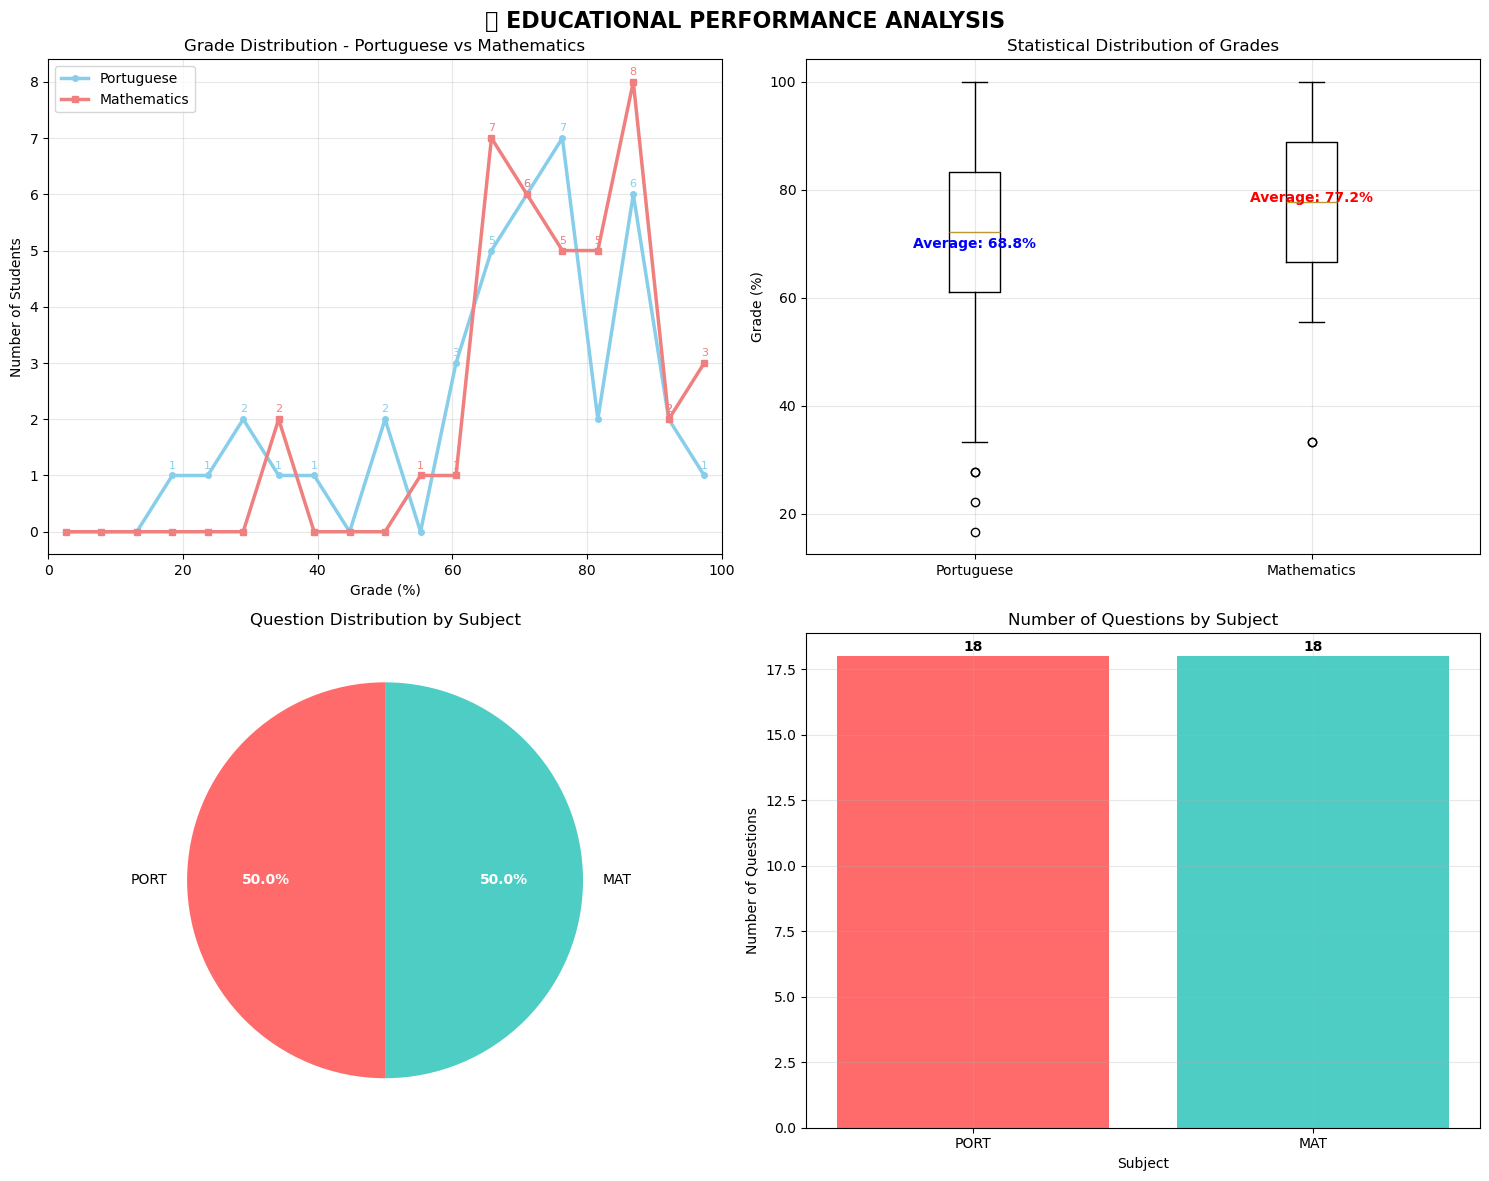


🎯 MOST FREQUENT CONTENT GRAPHS


/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_88578/2149073598.py:127: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


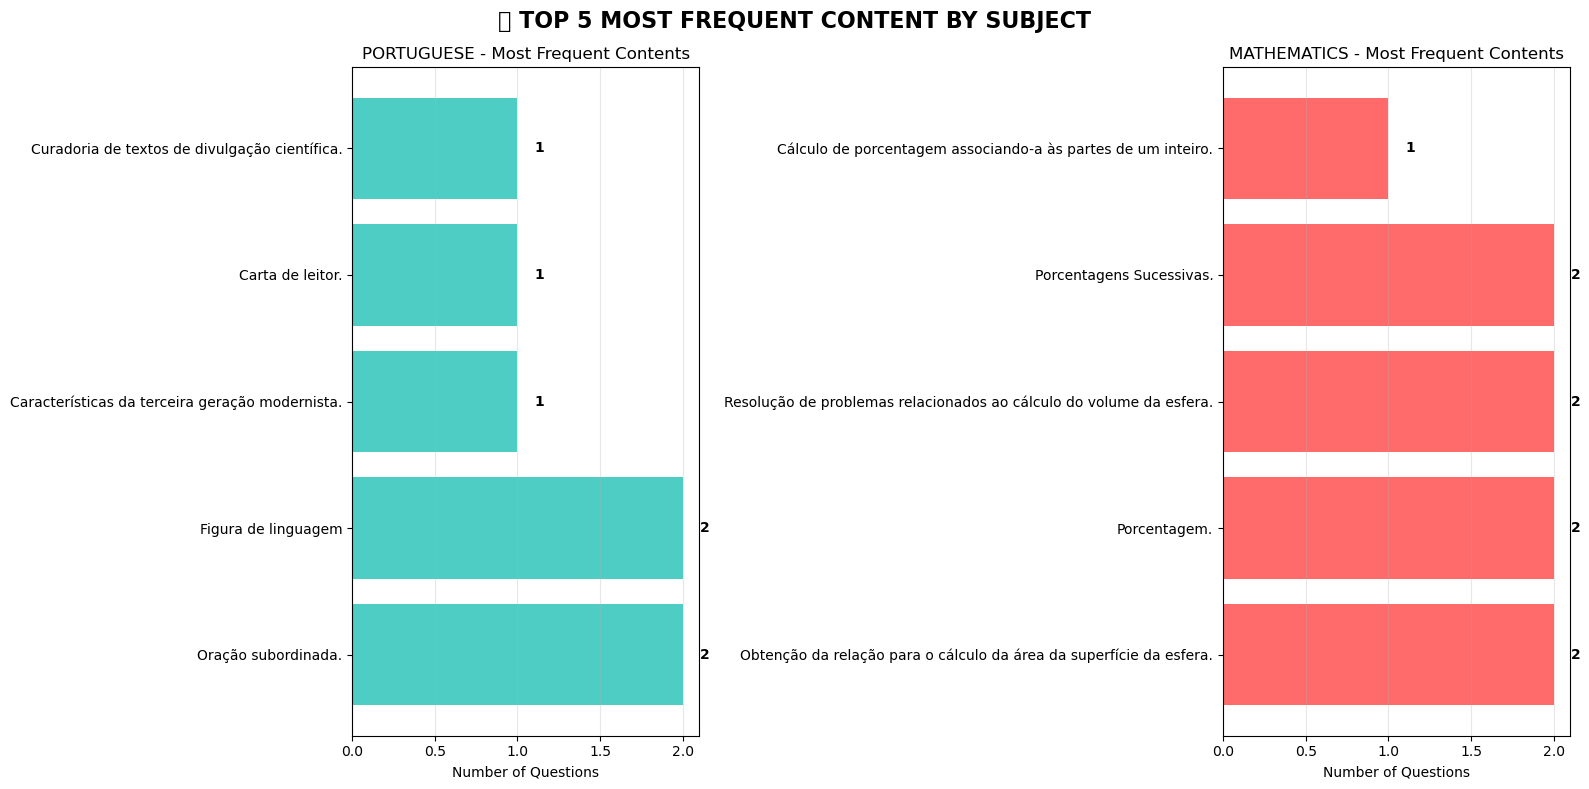


🔗 CORRELATION ANALYSIS


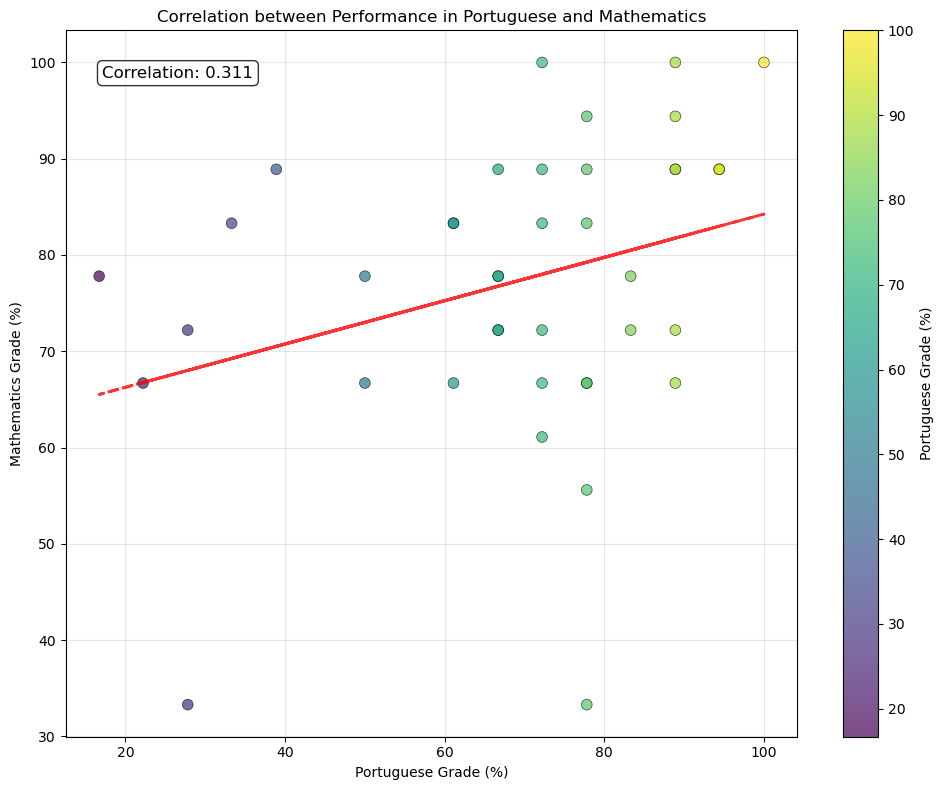


📈 VISUAL STATISTICAL SUMMARY


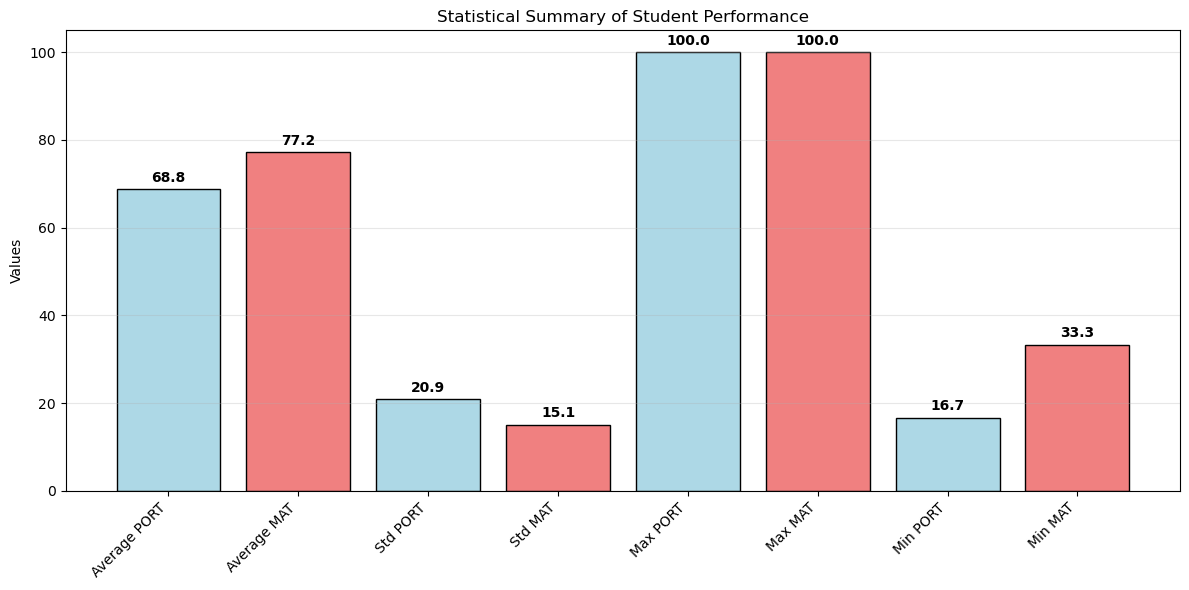


🎉 GRAPHS CREATED SUCCESSFULLY!


In [7]:
# Cell 4: Professional visualizations
print("\n=== CREATING GRAPHS ===")

# Style configuration
plt.style.use('default')
sns.set_palette("husl")

# 1. GRADE DISTRIBUTION GRAPH
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 EDUCATIONAL PERFORMANCE ANALYSIS', fontsize=16, fontweight='bold')

# 1.1 FREQUENCY GRAPH (lines with actual student count)
# Create bins from 0 to 100
bins = np.linspace(0, 100, 20)

# Calculate histograms
freq_port, bins_port = np.histogram(df_alunos['PORT'], bins=bins)
freq_mat, bins_mat = np.histogram(df_alunos['MAT'], bins=bins)

# Use bin midpoints for line graph
bin_centers = (bins[:-1] + bins[1:]) / 2

axes[0,0].plot(bin_centers, freq_port, linewidth=2.5, color='skyblue', label='Portuguese', marker='o', markersize=4)
axes[0,0].plot(bin_centers, freq_mat, linewidth=2.5, color='lightcoral', label='Mathematics', marker='s', markersize=4)
axes[0,0].set_xlabel('Grade (%)')
axes[0,0].set_ylabel('Number of Students')
axes[0,0].set_title('Grade Distribution - Portuguese vs Mathematics')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xlim(0, 100)  # Limiting from 0 to 100%

# Add values on points for clarity
for i, (x, y) in enumerate(zip(bin_centers, freq_port)):
    if y > 0:  # Only show values greater than zero
        axes[0,0].annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                          xytext=(0,5), ha='center', fontsize=8, color='skyblue')

for i, (x, y) in enumerate(zip(bin_centers, freq_mat)):
    if y > 0:  # Only show values greater than zero
        axes[0,0].annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                          xytext=(0,5), ha='center', fontsize=8, color='lightcoral')

# 1.2 Boxplot of grades
notas_boxplot = [df_alunos['PORT'], df_alunos['MAT']]
axes[0,1].boxplot(notas_boxplot, labels=['Portuguese', 'Mathematics'])
axes[0,1].set_ylabel('Grade (%)')
axes[0,1].set_title('Statistical Distribution of Grades')
axes[0,1].grid(True, alpha=0.3)

# Add average values
axes[0,1].text(1, df_alunos['PORT'].mean(), f'Average: {df_alunos["PORT"].mean():.1f}%', 
               ha='center', va='bottom', color='blue', fontweight='bold')
axes[0,1].text(2, df_alunos['MAT'].mean(), f'Average: {df_alunos["MAT"].mean():.1f}%', 
               ha='center', va='bottom', color='red', fontweight='bold')

# 1.3 Question distribution by subject
disciplina_counts = df_questoes['Disciplina'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']  # Specific colors for MAT and PORT
wedges, texts, autotexts = axes[1,0].pie(disciplina_counts.values, 
                                        labels=disciplina_counts.index,
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90)
axes[1,0].set_title('Question Distribution by Subject')

# Improve pie chart appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 1.4 Bar chart - number of questions by subject
bars = axes[1,1].bar(disciplina_counts.index, disciplina_counts.values, color=colors)
axes[1,1].set_xlabel('Subject')
axes[1,1].set_ylabel('Number of Questions')
axes[1,1].set_title('Number of Questions by Subject')
axes[1,1].grid(True, alpha=0.3)

# Add values on bars
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. MOST FREQUENT CONTENT GRAPHS
print("\n🎯 MOST FREQUENT CONTENT GRAPHS")

# Prepare data for contents
port_conteudos = df_questoes[df_questoes['Disciplina'] == 'PORT']['Conteúdo'].value_counts().head(5)
mat_conteudos = df_questoes[df_questoes['Disciplina'] == 'MAT']['Conteúdo'].value_counts().head(5)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('📚 TOP 5 MOST FREQUENT CONTENT BY SUBJECT', fontsize=16, fontweight='bold')

# 2.1 Portuguese Contents
if not port_conteudos.empty:
    bars_port = axes[0].barh(range(len(port_conteudos)), port_conteudos.values, color='#4ECDC4')
    axes[0].set_yticks(range(len(port_conteudos)))
    axes[0].set_yticklabels(port_conteudos.index, fontsize=10)
    axes[0].set_xlabel('Number of Questions')
    axes[0].set_title('PORTUGUESE - Most Frequent Contents')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for i, bar in enumerate(bars_port):
        width = bar.get_width()
        axes[0].text(width + 0.1, bar.get_y() + bar.get_height()/2., 
                    f'{int(width)}', ha='left', va='center', fontweight='bold')

# 2.2 Mathematics Contents
if not mat_conteudos.empty:
    bars_mat = axes[1].barh(range(len(mat_conteudos)), mat_conteudos.values, color='#FF6B6B')
    axes[1].set_yticks(range(len(mat_conteudos)))
    axes[1].set_yticklabels(mat_conteudos.index, fontsize=10)
    axes[1].set_xlabel('Number of Questions')
    axes[1].set_title('MATHEMATICS - Most Frequent Contents')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for i, bar in enumerate(bars_mat):
        width = bar.get_width()
        axes[1].text(width + 0.1, bar.get_y() + bar.get_height()/2., 
                    f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. CORRELATION GRAPH BETWEEN SUBJECTS
print("\n🔗 CORRELATION ANALYSIS")

fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of correlation
scatter = ax.scatter(df_alunos['PORT'], df_alunos['MAT'], alpha=0.7, 
                    c=df_alunos['PORT'], cmap='viridis', s=60, edgecolors='black', linewidth=0.5)
ax.set_xlabel('Portuguese Grade (%)')
ax.set_ylabel('Mathematics Grade (%)')
ax.set_title('Correlation between Performance in Portuguese and Mathematics')
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_alunos['PORT'], df_alunos['MAT'], 1)
p = np.poly1d(z)
ax.plot(df_alunos['PORT'], p(df_alunos['PORT']), "r--", alpha=0.8, linewidth=2)

# Calculate and show correlation
correlation = df_alunos['PORT'].corr(df_alunos['MAT'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Portuguese Grade (%)')

plt.tight_layout()
plt.show()

# 4. VISUAL STATISTICAL SUMMARY
print("\n📈 VISUAL STATISTICAL SUMMARY")

# Create a visual numerical summary
fig, ax = plt.subplots(figsize=(12, 6))

# Data for summary
metrics = ['Average PORT', 'Average MAT', 'Std PORT', 'Std MAT', 'Max PORT', 'Max MAT', 'Min PORT', 'Min MAT']
values = [
    df_alunos['PORT'].mean(), df_alunos['MAT'].mean(),
    df_alunos['PORT'].std(), df_alunos['MAT'].std(),
    df_alunos['PORT'].max(), df_alunos['MAT'].max(),
    df_alunos['PORT'].min(), df_alunos['MAT'].min()
]

colors = ['lightblue', 'lightcoral'] * 4
bars = ax.bar(metrics, values, color=colors, edgecolor='black')

ax.set_ylabel('Values')
ax.set_title('Statistical Summary of Student Performance')
ax.grid(True, alpha=0.3, axis='y')

# Rotate x-axis labels for better visualization
plt.xticks(rotation=45, ha='right')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
           f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎉 GRAPHS CREATED SUCCESSFULLY!")

# Educational Data Analysis Project - EDA Notebook

## 🚀 Implementation - Dataset Creation and Advanced Analysis

### Cell 6: Dataset Creation and Simulation

In [8]:
import pandas as pd
import numpy as np

# 1. Convert percentages to number of correct answers
df_alunos['acertos_PORT'] = (df_alunos['PORT'] * 18 / 100).round().astype(int)
df_alunos['acertos_MAT'] = (df_alunos['MAT'] * 18 / 100).round().astype(int)

# Ensure we are between 0 and 18
df_alunos['acertos_PORT'] = df_alunos['acertos_PORT'].clip(0, 18)
df_alunos['acertos_MAT'] = df_alunos['acertos_MAT'].clip(0, 18)

print("✅ Conversion from percentages to correct answers completed")

# 2. Number questions from 1 to 18 for each subject
df_questoes = df_questoes.sort_values(['Disciplina', 'Questão']).reset_index(drop=True)
df_questoes['questao_numero'] = df_questoes.groupby('Disciplina').cumcount() + 1

print("✅ Question numbering completed")

# 3. Create expanded DataFrame with all combinations
alunos = df_alunos['RA'].unique()
disciplinas = ['PORT', 'MAT']
questoes = range(1, 19)

combinacoes = []
for aluno in alunos:
    for disciplina in disciplinas:
        for questao in questoes:
            combinacoes.append({
                'RA': aluno,
                'Disciplina': disciplina,
                'questao_numero': questao
            })

df_expandido = pd.DataFrame(combinacoes)

# Join with actual number of correct answers
df_expandido = df_expandido.merge(
    df_alunos[['RA', 'acertos_PORT', 'acertos_MAT']],
    on='RA',
    how='left'
)

print("✅ Expanded DataFrame created")

# 4. Function to determine which questions were wrong
def determinar_questoes_erradas(grupo):
    disciplina = grupo['Disciplina'].iloc[0]
    
    if disciplina == 'PORT':
        n_acertos = grupo['acertos_PORT'].iloc[0]
    else:
        n_acertos = grupo['acertos_MAT'].iloc[0]
    
    n_erros = 18 - n_acertos
    
    # Randomly select WHICH questions were wrong
    todas_questoes = list(range(1, 19))
    questões_erradas = np.random.choice(todas_questoes, size=n_erros, replace=False)
    
    # Mark correct=1 for all questions initially
    grupo['acerto'] = 1
    grupo['erro'] = 0
    
    # Mark wrong questions as correct=0 and error=1
    grupo.loc[grupo['questao_numero'].isin(questões_erradas), 'acerto'] = 0
    grupo.loc[grupo['questao_numero'].isin(questões_erradas), 'erro'] = 1
    
    return grupo

# 5. Apply the function
np.random.seed(42)  # For reproducible results
df_simulado = df_expandido.groupby(['RA', 'Disciplina']).apply(determinar_questoes_erradas).reset_index(drop=True)

print("✅ Wrong question simulation completed")

# 6. Join with detailed information
df_final = df_simulado.merge(
    df_questoes,
    on=['Disciplina', 'questao_numero'],
    how='left'
)

# Join with student name and grade
df_final = df_final.merge(df_alunos[['RA', 'Nome', 'Série']], on='RA', how='left')

# 7. Reorganize columns more clearly
colunas_ordenadas = [
    'RA', 'Nome', 'Série', 'Disciplina', 'questao_numero', 
    'acerto', 'erro', 'Conteúdo', 'Descritor', 'Aula', 'Questão'
]

# Keep only columns that exist in the DataFrame
colunas_finais = [col for col in colunas_ordenadas if col in df_final.columns]
df_final = df_final[colunas_finais].sort_values(['RA', 'Disciplina', 'questao_numero'])

print("✅ Final dataset organized")

# 8. VERIFICATION
print("\n=== VERIFICATION ===")
verificacao = df_final.groupby(['RA', 'Disciplina']).agg({'acerto': 'sum'}).reset_index()
verificacao = verificacao.merge(df_alunos[['RA', 'acertos_PORT', 'acertos_MAT']], on='RA')

verificacao['acertos_esperados'] = verificacao.apply(
    lambda x: x['acertos_PORT'] if x['Disciplina'] == 'PORT' else x['acertos_MAT'], 
    axis=1
)

verificacao['diferenca'] = verificacao['acerto'] - verificacao['acertos_esperados']

print(f"Total records: {len(df_final)}")
print(f"Students: {df_final['RA'].nunique()}")
print(f"Records with zero difference: {(verificacao['diferenca'] == 0).sum()}/{len(verificacao)}")
print(f"Maximum difference: {verificacao['diferenca'].abs().max()}")

# 9. EXPORT TO CSV
nome_arquivo = 'desempenho_alunos_questoes.csv'
df_final.to_csv(nome_arquivo, index=False, encoding='utf-8-sig')

print(f"\n🎉 CSV FILE SUCCESSFULLY GENERATED!")
print(f"📁 File name: {nome_arquivo}")
print(f"📊 Total rows: {len(df_final):,}")
print(f"👥 Total students: {df_final['RA'].nunique()}")

✅ Conversion from percentages to correct answers completed
✅ Question numbering completed
✅ Expanded DataFrame created
✅ Wrong question simulation completed
✅ Final dataset organized

=== VERIFICATION ===
Total records: 1440
Students: 40
Records with zero difference: 80/80
Maximum difference: 0

🎉 CSV FILE SUCCESSFULLY GENERATED!
📁 File name: desempenho_alunos_questoes.csv
📊 Total rows: 1,440
👥 Total students: 40


/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_88578/2099938155.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_simulado = df_expandido.groupby(['RA', 'Disciplina']).apply(determinar_questoes_erradas).reset_index(drop=True)


### Cell 7: Advanced Visualizations of Simulated Data

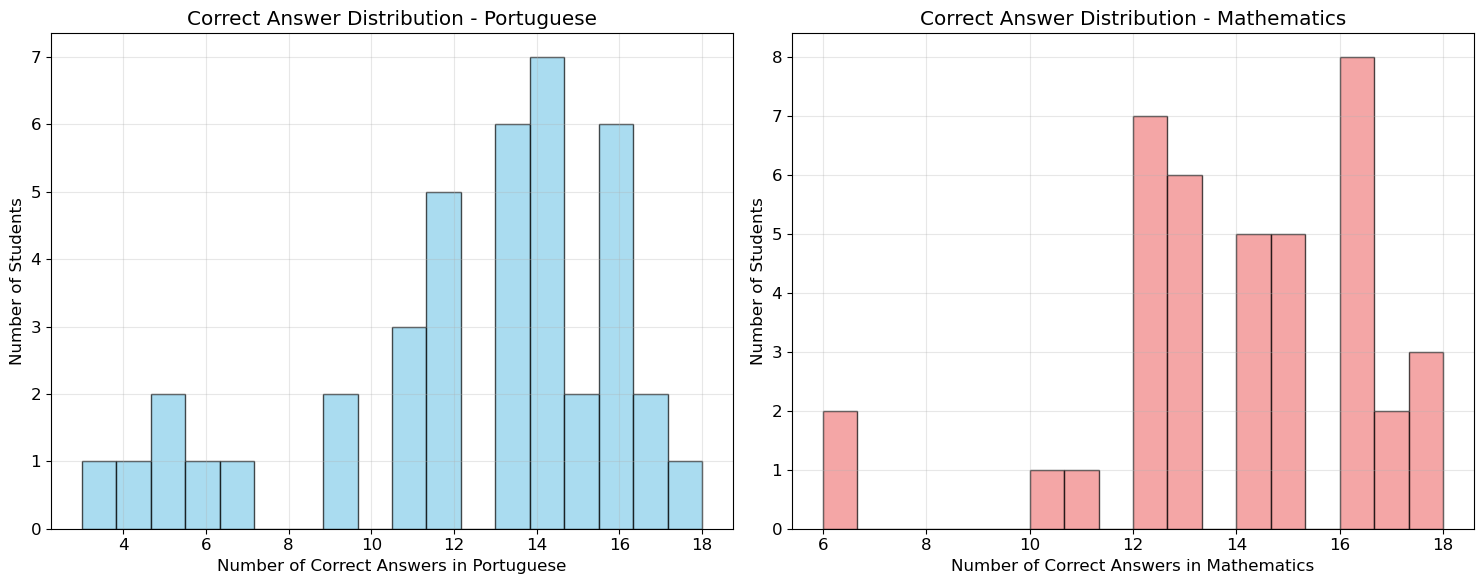

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np

# Style settings
plt.style.use('default')
sns.set_palette("husl")
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 12

# 1. GRADE DISTRIBUTION GRAPH BY SUBJECT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Portuguese
port_acertos = df_final[df_final['Disciplina'] == 'PORT'].groupby('RA')['acerto'].sum()
ax1.hist(port_acertos, bins=18, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Number of Correct Answers in Portuguese')
ax1.set_ylabel('Number of Students')
ax1.set_title('Correct Answer Distribution - Portuguese')
ax1.grid(True, alpha=0.3)

# Mathematics
mat_acertos = df_final[df_final['Disciplina'] == 'MAT'].groupby('RA')['acerto'].sum()
ax2.hist(mat_acertos, bins=18, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Number of Correct Answers in Mathematics')
ax2.set_ylabel('Number of Students')
ax2.set_title('Correct Answer Distribution - Mathematics')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribuicao_acertos.png', dpi=300, bbox_inches='tight')
plt.show()

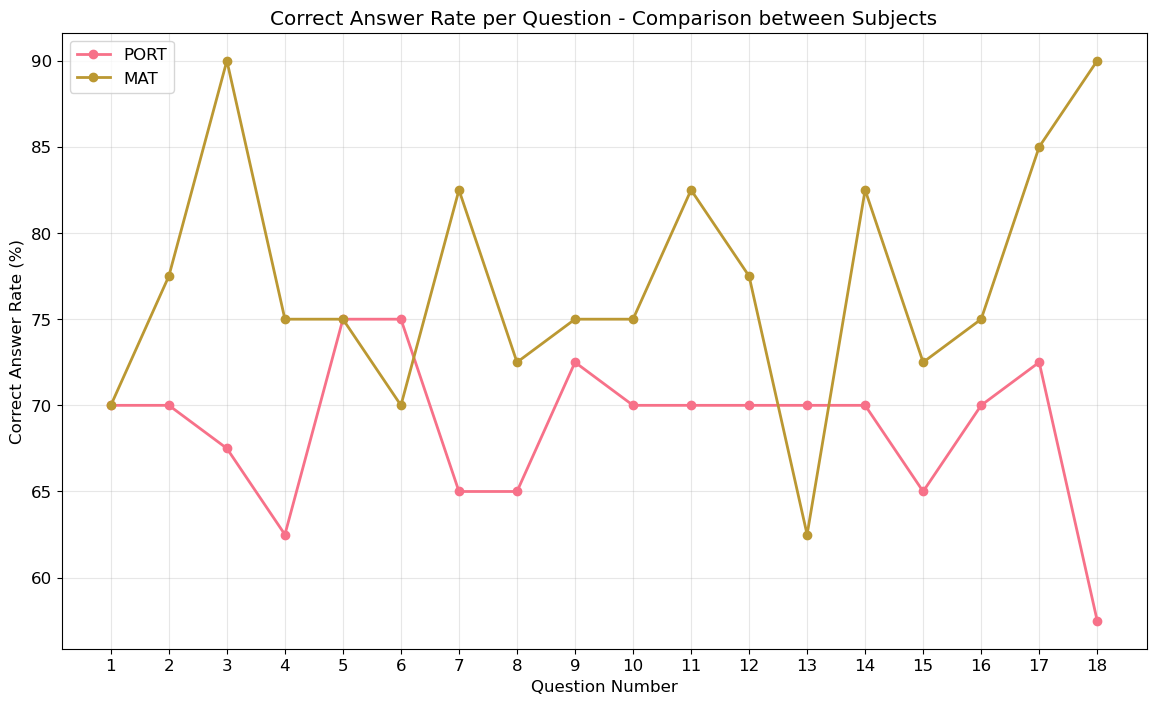

In [10]:
# 2. CORRECT ANSWER RATE PER QUESTION
plt.figure(figsize=(14, 8))

# Calculate correct answer rate per question and subject
taxa_acerto_questao = df_final.groupby(['Disciplina', 'questao_numero'])['acerto'].mean().reset_index()

# Graph separated by subject
for disciplina in ['PORT', 'MAT']:
    dados_disciplina = taxa_acerto_questao[taxa_acerto_questao['Disciplina'] == disciplina]
    plt.plot(dados_disciplina['questao_numero'], dados_disciplina['acerto'] * 100, 
             marker='o', linewidth=2, markersize=6, label=disciplina)

plt.xlabel('Question Number')
plt.ylabel('Correct Answer Rate (%)')
plt.title('Correct Answer Rate per Question - Comparison between Subjects')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 19))

plt.savefig('taxa_acerto_questao.png', dpi=300, bbox_inches='tight')
plt.show()

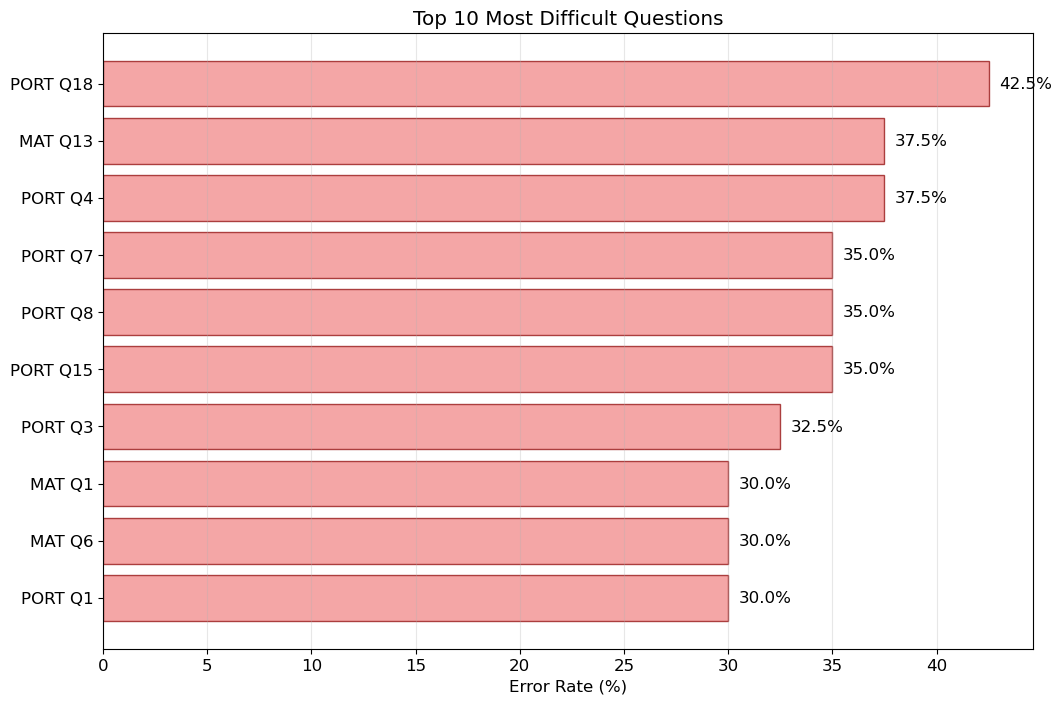

In [11]:
# 3. TOP 10 MOST DIFFICULT QUESTIONS
plt.figure(figsize=(12, 8))

# Calculate error rate per question
questoes_dificeis = df_final.groupby(['Disciplina', 'questao_numero']).agg({
    'acerto': 'mean',
    'erro': 'sum',
    'RA': 'count'
}).reset_index()

questoes_dificeis['taxa_erro'] = 1 - questoes_dificeis['acerto']
questoes_dificeis['questao_label'] = questoes_dificeis['Disciplina'] + ' Q' + questoes_dificeis['questao_numero'].astype(str)

# Sort by error rate
top_dificeis = questoes_dificeis.nlargest(10, 'taxa_erro')

# Bar chart
bars = plt.barh(top_dificeis['questao_label'], top_dificeis['taxa_erro'] * 100, 
                color='lightcoral', alpha=0.7, edgecolor='darkred')

plt.xlabel('Error Rate (%)')
plt.title('Top 10 Most Difficult Questions')
plt.gca().invert_yaxis()

# Add values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center')

plt.grid(True, alpha=0.3, axis='x')
plt.savefig('questoes_mais_dificeis.png', dpi=300, bbox_inches='tight')
plt.show()

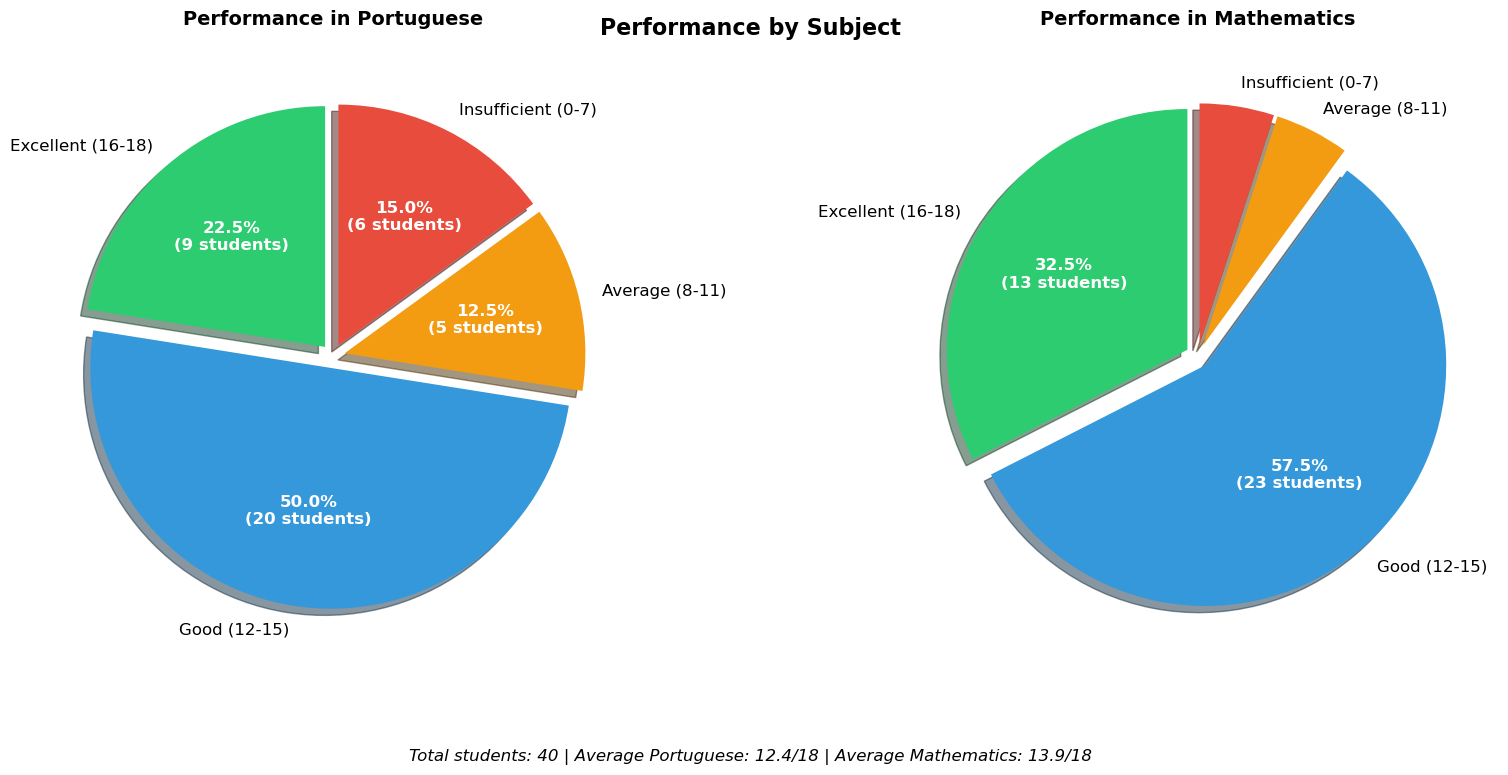


📊 PERFORMANCE CATEGORY ANALYSIS:

Excellent (16-18):
  Portuguese: 9 students (22.5%)
  Mathematics: 13 students (32.5%)

Good (12-15):
  Portuguese: 20 students (50.0%)
  Mathematics: 23 students (57.5%)

Average (8-11):
  Portuguese: 5 students (12.5%)
  Mathematics: 2 students (5.0%)

Insufficient (0-7):
  Portuguese: 6 students (15.0%)
  Mathematics: 2 students (5.0%)

🔍 HIGHLIGHTS:
• More students with Excellent performance in Mathematics
• More students with Insufficient performance in Portuguese


In [12]:
# 4. PIE CHART - PERFORMANCE DISTRIBUTION (IMPROVED VERSION)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Categorize performance (keeping the same order)
def categorizar_desempenho(acertos):
    if acertos >= 16: return 'Excellent (16-18)'
    elif acertos >= 12: return 'Good (12-15)'
    elif acertos >= 8: return 'Average (8-11)'
    else: return 'Insufficient (0-7)'

# Define category order and consistent colors
categorias_ordem = ['Excellent (16-18)', 'Good (12-15)', 'Average (8-11)', 'Insufficient (0-7)']
cores = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']  # Green, Blue, Orange, Red

# Portuguese
port_categorias = port_acertos.apply(categorizar_desempenho).value_counts()
# Reorder to follow defined order
port_categorias = port_categorias.reindex(categorias_ordem, fill_value=0)

# Mathematics
mat_categorias = mat_acertos.apply(categorizar_desempenho).value_counts()
# Reorder to follow defined order
mat_categorias = mat_categorias.reindex(categorias_ordem, fill_value=0)

# Function to customize text in pie chart
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val} students)' if pct > 5 else ''
    return my_autopct

# Portuguese chart
wedges1, texts1, autotexts1 = ax1.pie(port_categorias.values, 
                                      labels=port_categorias.index, 
                                      autopct=autopct_format(port_categorias.values),
                                      startangle=90, 
                                      colors=cores,
                                      explode=(0.05, 0.05, 0.05, 0.05),  # Separate slices
                                      shadow=True)

# Improve text appearance
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax1.set_title('Performance in Portuguese\n', fontsize=14, fontweight='bold')

# Mathematics chart
wedges2, texts2, autotexts2 = ax2.pie(mat_categorias.values, 
                                      labels=mat_categorias.index, 
                                      autopct=autopct_format(mat_categorias.values),
                                      startangle=90, 
                                      colors=cores,
                                      explode=(0.05, 0.05, 0.05, 0.05),  # Separate slices
                                      shadow=True)

# Improve text appearance
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2.set_title('Performance in Mathematics\n', fontsize=14, fontweight='bold')

# Add statistics below charts
total_alunos = len(port_acertos)
port_media = port_acertos.mean()
mat_media = mat_acertos.mean()

fig.text(0.5, 0.02, 
         f'Total students: {total_alunos} | '
         f'Average Portuguese: {port_media:.1f}/18 | '
         f'Average Mathematics: {mat_media:.1f}/18', 
         ha='center', fontsize=12, style='italic')

plt.suptitle('Performance by Subject', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Space for additional text
plt.savefig('distribuicao_categorias.png', dpi=300, bbox_inches='tight')
plt.show()

# Add textual analysis
print("\n📊 PERFORMANCE CATEGORY ANALYSIS:")
print("=" * 50)

for i, categoria in enumerate(categorias_ordem):
    port_percent = (port_categorias.values[i] / total_alunos) * 100
    mat_percent = (mat_categorias.values[i] / total_alunos) * 100
    
    print(f"\n{categoria}:")
    print(f"  Portuguese: {port_categorias.values[i]} students ({port_percent:.1f}%)")
    print(f"  Mathematics: {mat_categorias.values[i]} students ({mat_percent:.1f}%)")

# Comparative analysis
print("\n🔍 HIGHLIGHTS:")
if port_categorias.values[0] > mat_categorias.values[0]:
    print(f"• More students with Excellent performance in Portuguese")
else:
    print(f"• More students with Excellent performance in Mathematics")

if port_categorias.values[3] > mat_categorias.values[3]:
    print(f"• More students with Insufficient performance in Portuguese")
else:
    print(f"• More students with Insufficient performance in Mathematics")

1. **Visualization files**:
   - `distribuicao_acertos.png` - Correct answer distribution
   - `taxa_acerto_questao.png` - Correct answer rate per question
   - `questoes_mais_dificeis.png` - Top 10 most difficult questions
   - `distribuicao_categorias.png` - Performance category distribution

2. **Data files**:
   - `desempenho_alunos_questoes.csv` - Complete simulated dataset

- [x] Data loading and cleaning
- [x] Exploratory data analysis
- [x] Statistical analysis
- [x] Data visualization
- [x] Dataset simulation and export
- [x] Performance categorization
- [x] Documentation and reporting